### <span style="color:#458B74;font-weight: bolder;font-family: cursive;font-size: 24px"> <center>“Computers are able to see, hear and learn.<br> Welcome to the future”.<br> -Dave Walters- </center> </span> 

 <p style="color:#458B74;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px dotted #458B74;font-size:22px"> ✨Spaceship-Titanic : EDA & classification models ✨<span style='font-size:28px; background-color:blue ;'></span></p>

<img src= "https://i.ytimg.com/vi/bY4nfC1knJc/maxresdefault.jpg" alt ="Titanic" style='width: 100%;height:300px'>

### Table of Contents

* [**Task and probleme statement**](#Chapter1)
* [**EDA and correlation anlysis**](#Chapter2)
    * [**Managing Missing Values**](#section_2_1)
    * [**Univariate Analysis**](#section_2_2) 
        * [**Numerical Data**](#section_2_2_1)
        * [**Categorical Data**](#section_2_2_2)
    * [**Bivariate Analysis**](#section_2_3)
        * [**Numerical-Numerical analysis**](#section_2_3_1)
        * [**Numerical-Categorical analysis**](#section_2_3_2)
        * [**Categorical-Categorial analysis**](#section_2_3_3)
    * [**Managing Outliers**](#section_2_4)
    * [**Features Seletion using statistical tests**](#section_2_5)  
        * [**Anova Test**](#section_2_5_1)
        * [**Chi-square Test**](#section_2_5_2)
* [**Model Building**](#Chapter3)
* [**Model choice and submission**](#Chapter4)
    

<span style=" padding: 5px; border-radius:5px;color:red;font-weight: bolder;font-size: 24px;font-family: cursive">If you like my work, don't forget to upvote and leave me a comment.This will help me to continue and sharing more topics in the coming days. I hope this work will impress you.</span>

# <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  1  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Task and probleme statement</span> <a class="anchor" id="Chapter1"></a>

In this competition our task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To make these predictions, we're given a set of personal records recovered from the ship's damaged computer system.
## 📁File and Data Field Descriptions
* <span style="color:green;font-weight: bolder">train.csv</span> - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
  * <span style="color:blue;font-weight: bolder">PassengerId</span> - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  * <span style="color:blue;font-weight: bolder">HomePlanet</span> - The planet the passenger departed from, typically their planet of permanent residence.
  * <span style="color:blue;font-weight: bolder">Cryosleep</span> - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  * <span style="color:blue;font-weight: bolder">Cabin</span> - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  * <span style="color:blue;font-weight: bolder">Destination</span> - The planet the passenger will be debarking to.
  * <span style="color:blue;font-weight: bolder">Age</span> - The age of the passenger.
  * <span style="color:blue;font-weight: bolder">VIP</span> - Whether the passenger has paid for special VIP service during the voyage.
  * <span style="color:blue;font-weight: bolder">RoomService, FoodCourt, ShoppingMall, Spa, VRDeck</span> - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  * <span style="color:blue;font-weight: bolder">Name</span> - The first and last names of the passenger.
  * <span style="color:blue;font-weight: bolder">Transported</span> - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* <span style="color:green;font-weight: bolder">test.csv</span> - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
* <span style="color:green;font-weight: bolder">sample_submission.csv</span> - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

In [1]:
# Import Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,plot_confusion_matrix

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')



/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  2  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">EDA and Correlation analysis</span> <a class="anchor" id="Chapter2"></a>

In [2]:
#Data loading and overview
df_train=pd.read_csv('../input/spaceship-titanic/train.csv')
df_test=pd.read_csv('../input/spaceship-titanic/test.csv')
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Print the dimentions of training dataset and test dataset
print(f'The dataset df_train contains {df_train.shape[0]} rows and {df_train.shape[1]} columns : {df_train.shape}')
print(f'The dataset df_test contains {df_test.shape[0]} rows and {df_test.shape[1]} columns : {df_test.shape}')

The dataset df_train contains 8693 rows and 14 columns : (8693, 14)
The dataset df_test contains 4277 rows and 13 columns : (4277, 13)


In [4]:
#Print summary of training dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


From the table above we see that:
* we have quite some categorical columns as well as numerical columns (6 numerial columns and 8 categorical columns ).
* All columns have missing values exept for 'PassengerId' and 'Transported'. These missing values will be dealt with later in [**Managing Missing values**](#Chapter3) part.

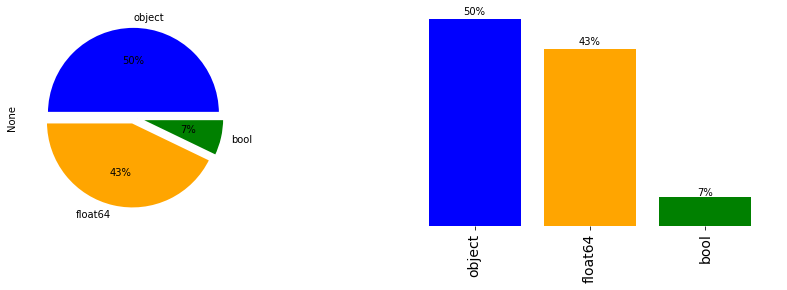

In [5]:
#Plot data types
result=df_train.dtypes.value_counts(normalize=True)
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
result.plot(kind='pie',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=['blue', 'orange', 'green'], autopct="%.0f%%",explode = (0.05, 0.05, 0.05))
plt.subplot(1,2,2)
ax = result.plot(kind='bar',figsize=(15,4),width = 0.8,color=['blue', 'orange', 'green'],edgecolor=None)
plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])
# Add this loop to add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')
plt.show()

* Loking at the visualisations above, we see that **50%** of columns are object, **43%** are float and **7%** are booleans

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  2.1  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Managing Missing Values</span> <a class="anchor" id="section_2_1"></a>

In [6]:
#Checking for missing values in each column of the training dataset
df_train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

<Figure size 720x432 with 0 Axes>

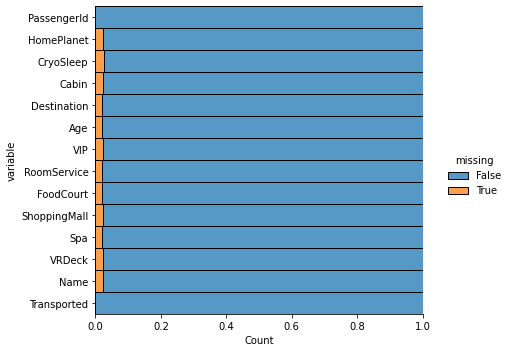

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_train.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

<AxesSubplot:>

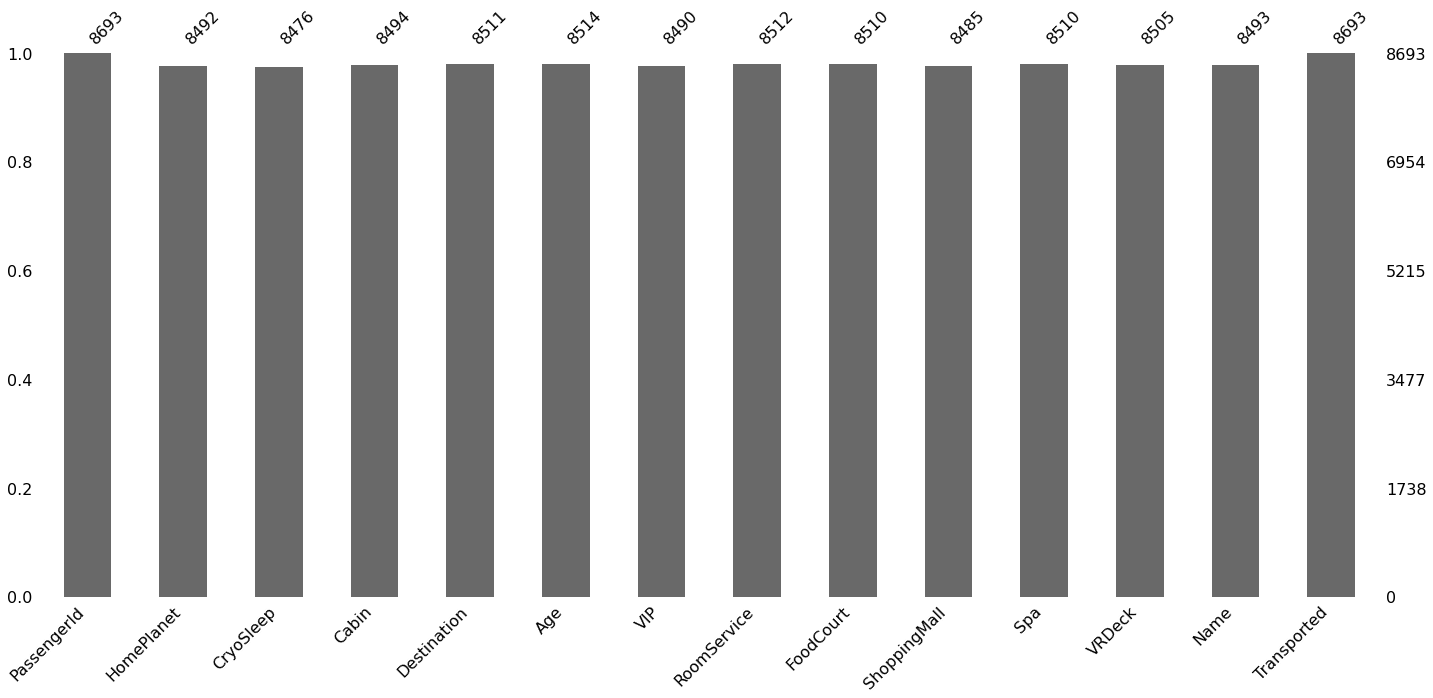

In [8]:
msno.bar(df_train)

In [9]:
#Split df_train and df_test columns into numerical and categorical 
num_features=[col for col in df_train.select_dtypes('number')]
categ_features=[col for col in df_train.select_dtypes(exclude=['number'])]
test_categ_features=[col for col in df_test.select_dtypes(exclude=['number'])]

#replace missing values in each numerical column with the mediane
for col in num_features:
    df_train[col].fillna(df_train[col].median(), inplace=True)
    df_test[col].fillna(df_test[col].median(), inplace=True)
    
#replace missing values in each categorical column with the most frequent value
for col in categ_features:
    df_train[col].fillna(df_train[col].value_counts().index[0], inplace=True)
for col in test_categ_features:
    df_test[col].fillna(df_test[col].value_counts().index[0], inplace=True)   

In [10]:
#Checking for missing values in df_train after imputation
df_train.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [11]:
#Checking for missing values in df_test after imputation
df_test.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  2.2  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Univariate Analysis</span> <a class="anchor" id="Section_2_2"></a>

> ### <span style="color:orange;font-weight: bolder">Numerical Data</span> <a class="anchor" id="section_2_2_1"></a>

In [12]:
#Print numerical columns
print("numerical columns are : ",num_features)

numerical columns are :  ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [13]:
#Print summary of numerical columns
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


From the above informations about numericals features we see that:
* The average age of passenger is 29 and the oldest passenger has 79 years.
* The average Amount the passenger has billed for room service is around 225,and the heighest amount is around 14327.
*  The average Amount the passenger has billed at the food court is around 458, and the heighest amount is around 29813.
* The average Amount the passenger has billed at the shopping mall is around 174, and the heighest amount is around 23492.
* The average Amount the passenger has billed at the spa is around 311, and the heighest amount is around 22408.
* The average Amount the passenger has billed at the VR deck is around 305, and the heighest amount is around 24133.
* There are somme passengers who hasn't billed any amount.



> ### <span style="color:blue">How many passengers who have not billed any amount? what's their average age?</span>

In [14]:
data_amount=df_train[(df_train['RoomService']==0) & (df_train['Spa']==0) & (df_train['VRDeck']==0) & (df_train['FoodCourt']==0) & (df_train['ShoppingMall']==0)]
nbr=data_amount.shape[0]
average_age=data_amount['Age'].mean().round()
print(f'There are {nbr} passengers who have not billed any amount, and their average age is {average_age}')

There are 3653 passengers who have not billed any amount, and their average age is 25.0


> ### <span style="color:blue">What's the most frequent age categorie?</span>

In this setion we'll devide the age variable into 4 main sections in order to identify the most frequent age categorie.
* **Children (00-14 years)**
* **Youth (15-24 years)**
* **Adults (25-64 years)**
* **Seniors (65 years and over)**

In [15]:
Children_nbr=df_train[df_train['Age']<=14].shape[0]
Youth_nbr=df_train[(df_train['Age']>=15)&(df_train['Age']<=24)].shape[0]
Adult_nbr=df_train[(df_train['Age']>=25)&(df_train['Age']<=64)].shape[0]
Seniors_nbr=df_train[(df_train['Age']>=65)].shape[0]
print('Number of children passengers on titanic spaceship is :',Children_nbr )
print('Number of young passengers on titanic spaceship is :',Youth_nbr )
print('Number of adults passengers on titanic spaceship is :',Adult_nbr )
print('Number of seniors passengers on titanic spaceship is :',Seniors_nbr )


Number of children passengers on titanic spaceship is : 1085
Number of young passengers on titanic spaceship is : 2568
Number of adults passengers on titanic spaceship is : 4933
Number of seniors passengers on titanic spaceship is : 107


It seems that the majority of passengers are adult with age between 24 and 64.

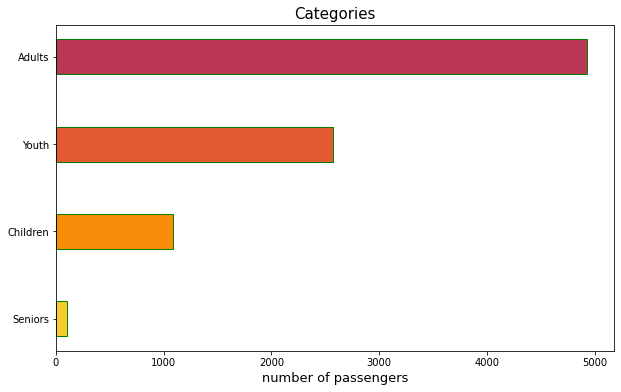

In [16]:
# creating the bar plot
sorted_list = [(107,'Seniors'),(1085, 'Children'),(2568, 'Youth'),(4933, 'Adults')]
features_sorted = []
importance_sorted = []

for i in sorted_list:
    features_sorted += [i[1]]
    importance_sorted += [i[0]]

plt.figure(figsize=(10,6))
plt.title("Categories", fontsize=15)
plt.xlabel("number of passengers", fontsize=13)

plt.barh(features_sorted, importance_sorted, color=sns.color_palette("inferno_r", 7), edgecolor='green', height=0.4)
plt.show()

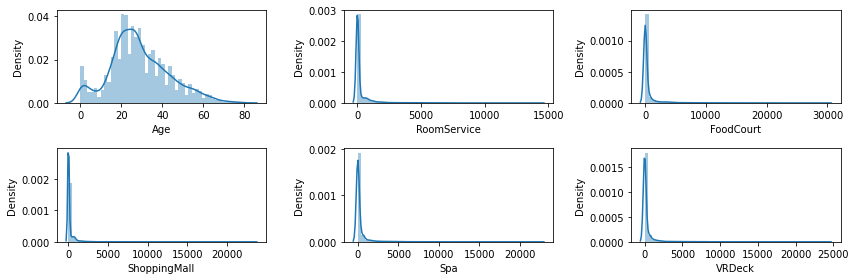

In [17]:
#Plot distribution of numerical columns
fig = plt.figure(figsize= (12,4))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot( 2, 3, i+1)
    
    sns.distplot(df_train[col])

fig.tight_layout()  
plt.show()

Looking at the distriutions of each numerical feature, we see that:
* The distribution of age is bimodale, because it has two peaks 
* The distribution of the variables: RoomServie, FoodCourt, ShoppingMall, Spa, RDeck is skewed, we can confirme that using skew function.

In [18]:
# Skew function of Pandas
skew = df_train[num_features].skew(skipna = True).sort_values(ascending=False)
skew

ShoppingMall    12.763842
VRDeck           7.904554
Spa              7.716450
FoodCourt        7.177515
RoomService      6.397766
Age              0.431102
dtype: float64

As we can see all the skewness values are greater than 0, we can understand that our numerical features : RoomServie, FoodCourt, ShoppingMall, Spa, RDeck are right-skewed.

we can say that these variables have outliers that skew the data. These values will be dealt with later in [**Managing Outliers**](#section_2_4) part.

> ### <span style="color:orange;font-weight: bolder">Categorical Data</span> <a class="anchor" id="section_2_2_2"></a>

In [19]:
df_train['Transported'].replace(to_replace=[False,True],value=['No','Yes'],inplace=True)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,No
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,Yes
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,No
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,No
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,Yes


In [20]:
#Print summary of categorical columns in training dataset
df_train.describe(include='object')

,PassengerId,HomePlanet,Cabin,Destination,Name,Transported
count,8693,8693,8693,8693,8693,8693
unique,8693,3,6560,3,8473,2
top,0001_01,Earth,G/734/S,TRAPPIST-1e,Gollux Reedall,Yes
freq,1,4803,207,6097,202,4378


Looking at the informations above we see that:
* All categorical columns have missing values, exept the target variable **"Transported"**.
* the vast majority of passengers were traveling to **TRAPPIST-1e**.
* Most passengers are from **Earth** .
* Most of passengers have paid for special **VIP** service during the voyage.
* The variable **cabin** has 6560 categories, therefore, we cannot use it directly for our model.


In [21]:
#print categories of each categorical column
for col in df_train.select_dtypes(exclude=['number']):
  print(f'{col:-<30},{df_train[col].unique()}')

PassengerId-------------------,['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02']
HomePlanet--------------------,['Europa' 'Earth' 'Mars']
CryoSleep---------------------,[False  True]
Cabin-------------------------,['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
Destination-------------------,['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP---------------------------,[False  True]
Name--------------------------,['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre']
Transported-------------------,['No' 'Yes']


In [22]:
#Creating new features for training dataset and test dataset

#Cabin has three values deck/num/side, so we'll create two columns for deck and side
df_train["Deck"] = df_train["Cabin"].apply(lambda x: str(x).split("/")[0])
df_test["Deck"] = df_test["Cabin"].apply(lambda x: str(x).split("/")[0])
df_train["side"] =df_train["Cabin"].apply(lambda x: x.split("/")[2])
df_test["side"] = df_test["Cabin"].apply(lambda x: x.split("/")[2])

#Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group, so we'll create two new features GroupId and GroupIdNumber
df_train["GroupId"] = df_train["PassengerId"].apply(lambda x: x.split("_")[0])
df_test["GroupId"] = df_test["PassengerId"].apply(lambda x: x.split("_")[0])
df_train["GroupIdNumber"] =df_train["PassengerId"].apply(lambda x: x.split("_")[1])
df_test["GroupIdNumber"] = df_test["PassengerId"].apply(lambda x: x.split("_")[1])

In [23]:
# Creating new feature InGroup to indicate if a passenger is alone or in group
Group_train =df_train[df_train["GroupId"].duplicated()]["GroupId"]
Group_test =df_test[df_test["GroupId"].duplicated()]["GroupId"]
df_train["InGroup"] = df_train["GroupId"].apply(lambda x: x in Group_train.values)
df_test["InGroup"] = df_test["GroupId"].apply(lambda x: x in Group_test.values)

In [24]:
#Drop 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' from df_train
df_train.drop(['PassengerId','Cabin','Name','GroupId','GroupIdNumber'], axis=1, inplace=True)
#Save PassengerId and Name
Id_test_list = df_test["PassengerId"].tolist()
#Drop 'PassengerId','Cabin','Name','GroupId','GroupIdNumber' from df_test
df_test.drop(['PassengerId','Cabin','Name','GroupId','GroupIdNumber'], axis=1, inplace=True)

In [25]:
#print categories of each categorical column after removing unnecessary columns
for col in df_train.select_dtypes(exclude=['number']):
  print(f'{col:-<30},{df_train[col].unique()}')

HomePlanet--------------------,['Europa' 'Earth' 'Mars']
CryoSleep---------------------,[False  True]
Destination-------------------,['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']
VIP---------------------------,[False  True]
Transported-------------------,['No' 'Yes']
Deck--------------------------,['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T']
side--------------------------,['P' 'S']
InGroup-----------------------,[False  True]


In [26]:
#Print categorical columns in df_train after removing unnecessary columns
new_categ_features=[col for col in df_train.select_dtypes(exclude=['number'])]

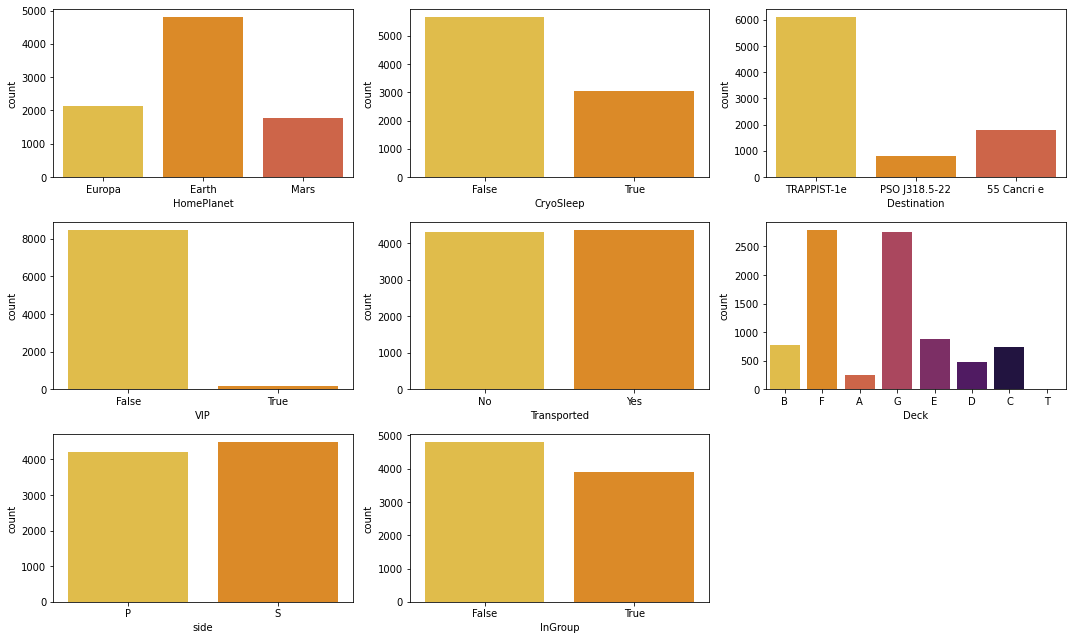

In [27]:
colors =sns.color_palette("inferno_r", 7)
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(new_categ_features):
    
    ax=fig.add_subplot(3, 3, i+1)
    
    sns.countplot(x=df_train[col],palette=colors, ax=ax)

fig.tight_layout()  
plt.show()

* Most passengers were traveling on both Deck F, G and on Starboard-side.
* More than half of passengers choose to travel alone.
* Few passengers were in CryoSleep.
* Passengers had an overall even chance of being transported






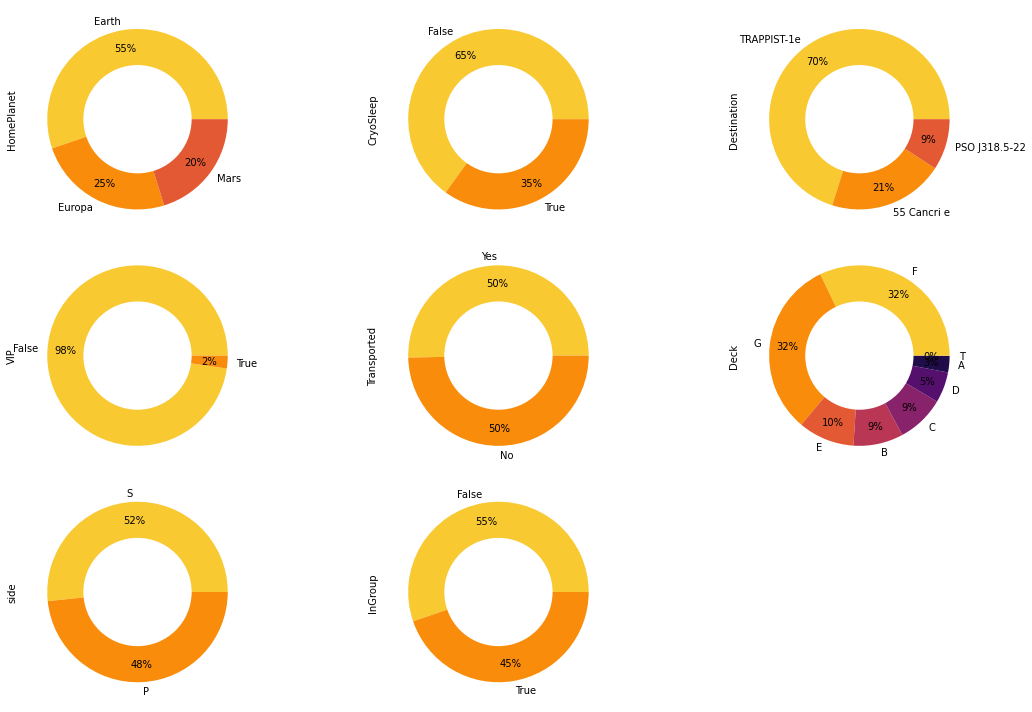

In [28]:
#Plot donut chart for each categorical column
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(new_categ_features):
    
    ax=fig.add_subplot( 3, 3, i+1)
    
    df_train[col].value_counts().plot.pie(autopct='%.0f%%', pctdistance=0.80, colors=sns.color_palette("inferno_r", 7))
    # draw circle
    centre_circle = plt.Circle((0, 0), 0.60, fc='white')
    fig1 = plt.gcf()
    # Adding Circle in Pie chart
    fig1.gca().add_artist(centre_circle)
fig.tight_layout()  
plt.show()

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  2.3  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Bivariate Analysis</span> <a class="anchor" id="section_2_3"></a>

> ### <span style="color:orange;font-weight: bolder">Numerical-Numerical Analysis</span> <a class="anchor" id="section_2_3_1"></a>

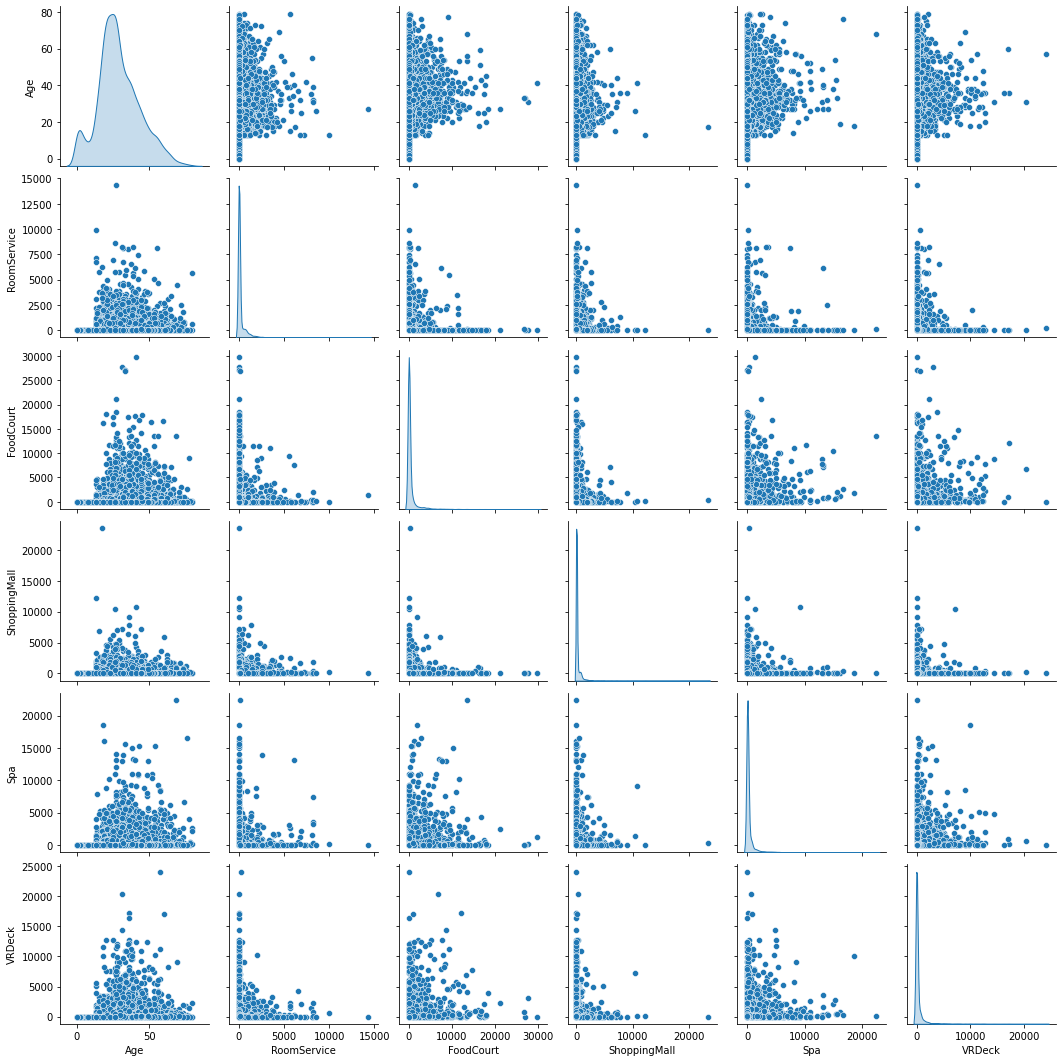

In [29]:
#plot the pair plot of numerical features
sns.pairplot(data = df_train, vars=num_features, diag_kind="kde")

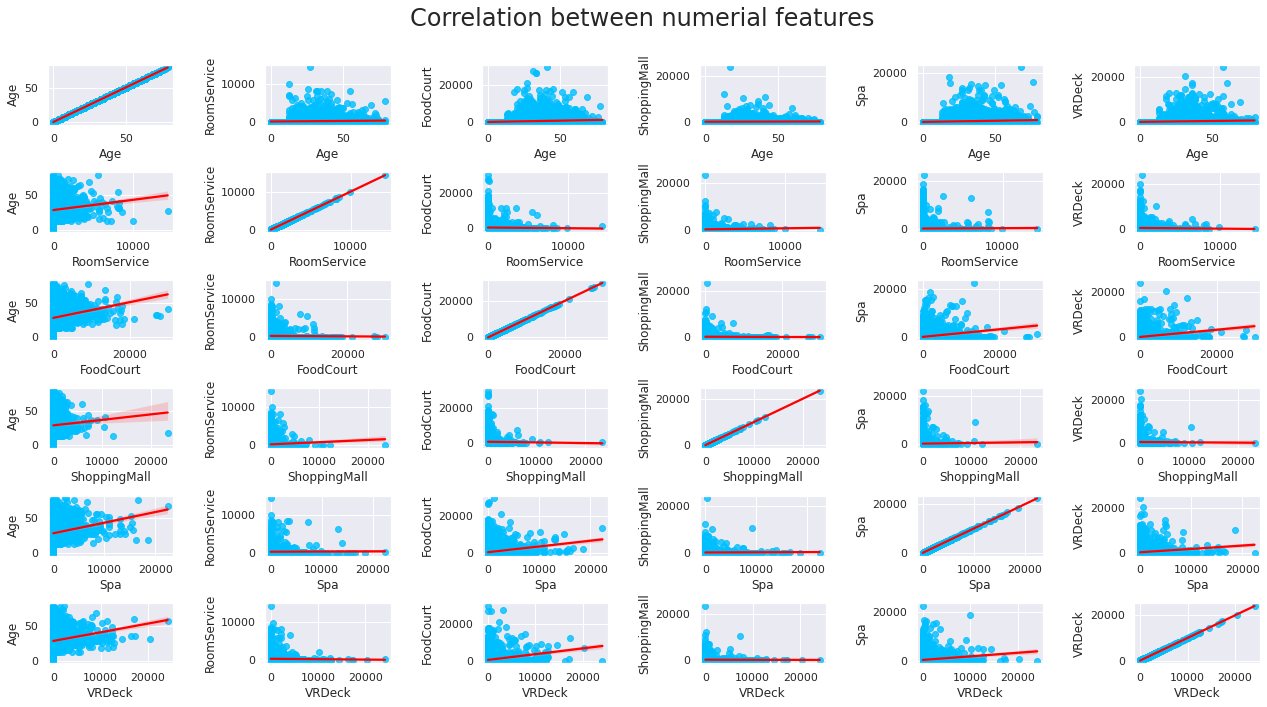

In [30]:
sns.set()
#define plotting region (6 rows, 6 columns)
fig, axes = plt.subplots(6, 6,figsize=(18, 10))
fig.suptitle('Correlation between numerial features', fontsize=24)
for i,col1 in enumerate(num_features):
    for j,col2 in enumerate(num_features):
        sns.regplot(x=col1,y=col2,data=df_train,color='blue', scatter_kws={
                    "color": "deepskyblue"}, line_kws={"color": "red"}, ax=axes[i,j])
fig.tight_layout()
plt.subplots_adjust(top=0.90)

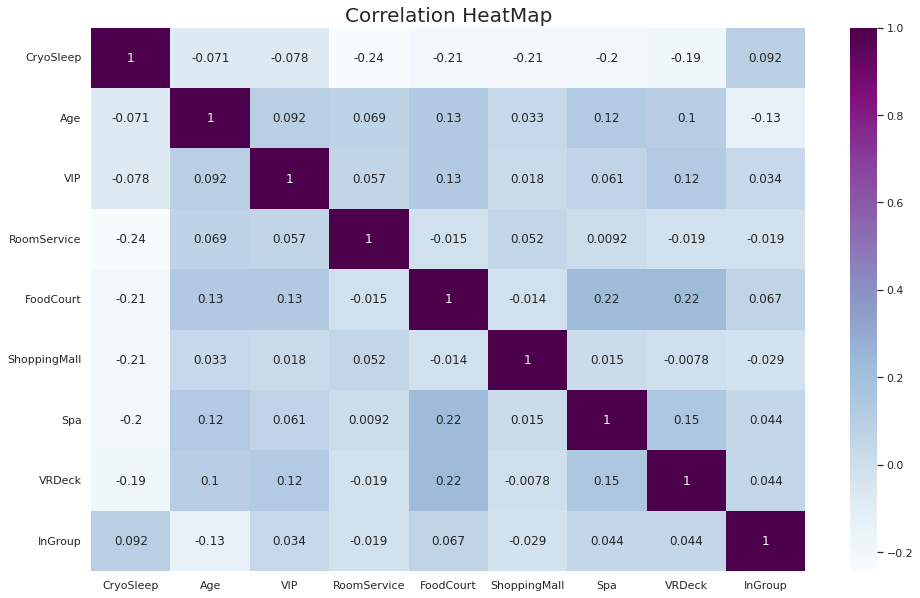

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(),cmap='BuPu',annot=True)
plt.title ('Correlation HeatMap', fontsize=20)
plt.show()

It seems that numericals features are not strongly correlated.

> ### <span style="color:orange;font-weight: bolder">Numerical-Categorical Analysis</span> <a class="anchor" id="section_2_3_2"></a>

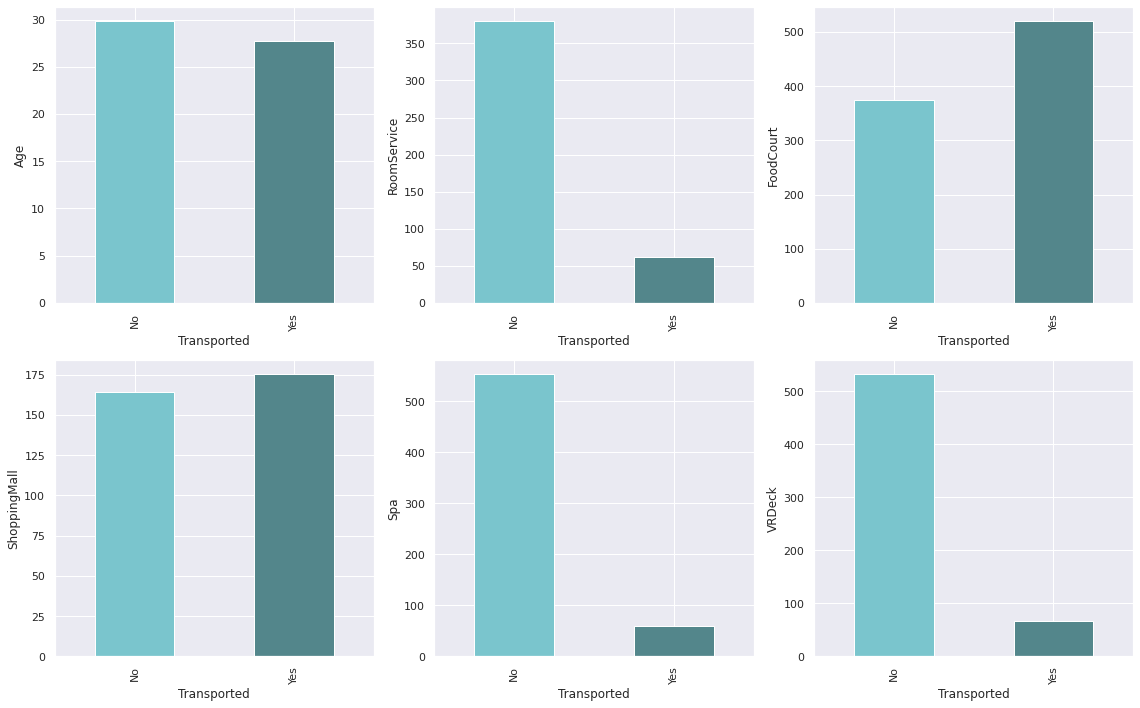

In [32]:
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot( 2, 3, i+1)

    df_train.groupby(['Transported'])[col].mean().plot(kind='bar',color=["#7AC5CD","#53868B"])
    ax.set_ylabel(col)
fig.tight_layout()  
plt.show()

Looking at the visualisations above we see that:
* Majority of passengers, who spent more on Room Service, Spa and VRDeck were not transported.
* Majority of passengers who spent more on Food Court and Shopping Mall got transported.

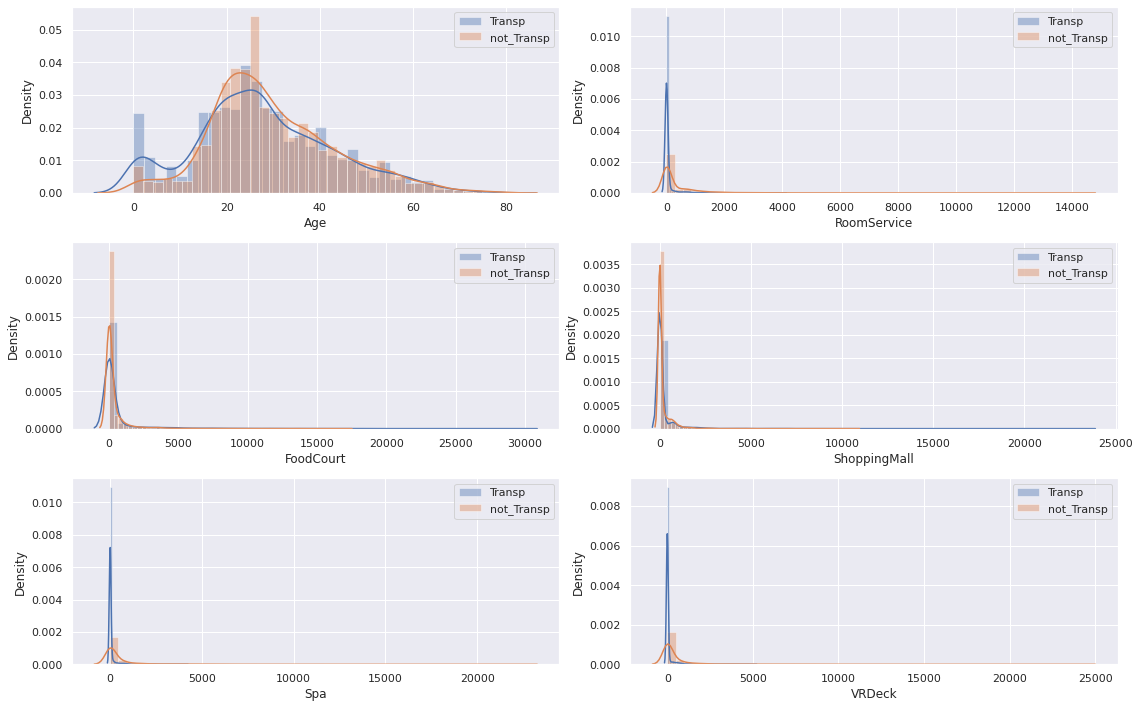

In [33]:
Transported_df=df_train[df_train['Transported']=='Yes']
NotTransported_df=df_train[df_train['Transported']=='No']
fig = plt.figure(figsize= (16,10))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot( 3, 2, i+1)
    
    sns.distplot(Transported_df[col],label='Transp')
    sns.distplot(NotTransported_df[col],label='not_Transp')
    plt.legend()
    
fig.tight_layout()  
plt.show()

The distribution of each numerical feature for Transported and NoTransported passengers seems different. Therefore, these variables affect chances of being transported.

In [34]:
#Plot stucked bar graph
df_columns=[col for col in new_categ_features if col!='Transported']
for col in df_columns:
    df_people = df_train.groupby([ "Transported",col])["RoomService"]
    df_people = df_people.sum().reset_index()
    fig_people = px.bar(df_people, x=col, y="RoomService", color="Transported", barmode="stack", text="RoomService")
    fig_people.show()

> ### <span style="color:orange;font-weight: bolder">Categorical-Categorical Analysis</span> <a class="anchor" id="section_2_3_3"></a>

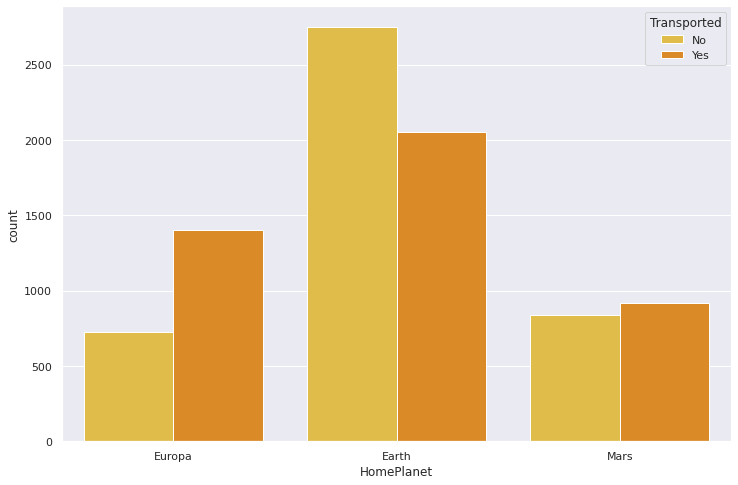

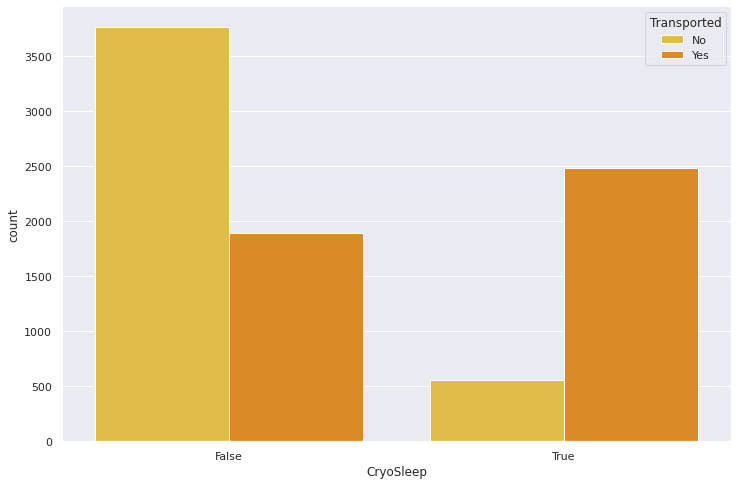

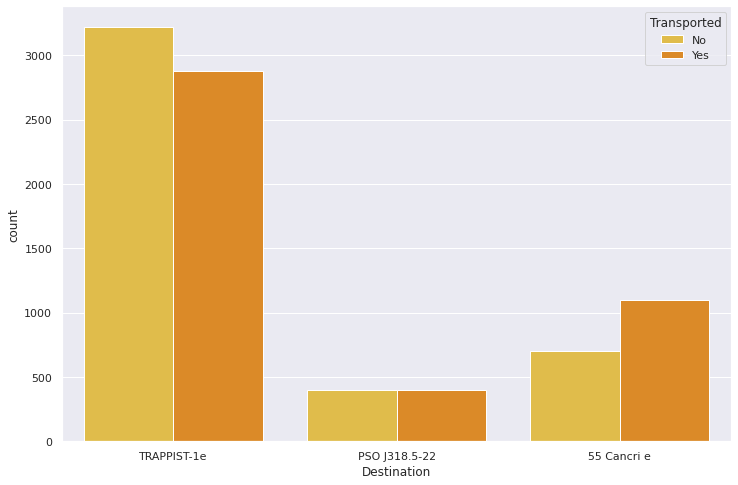

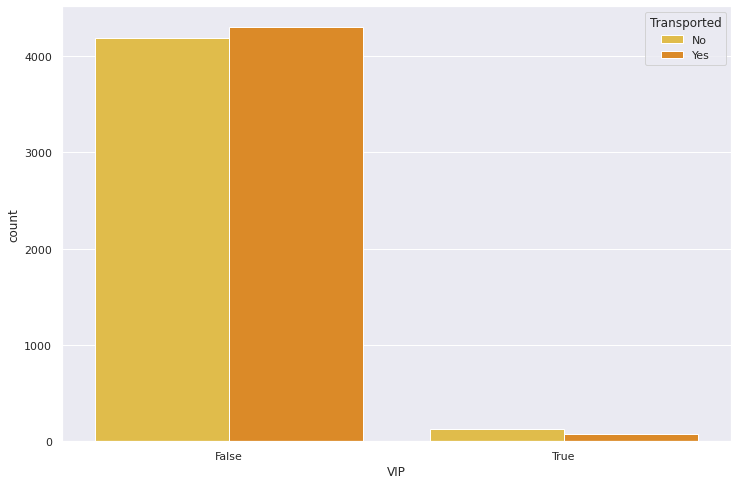

<Figure size 864x576 with 0 Axes>

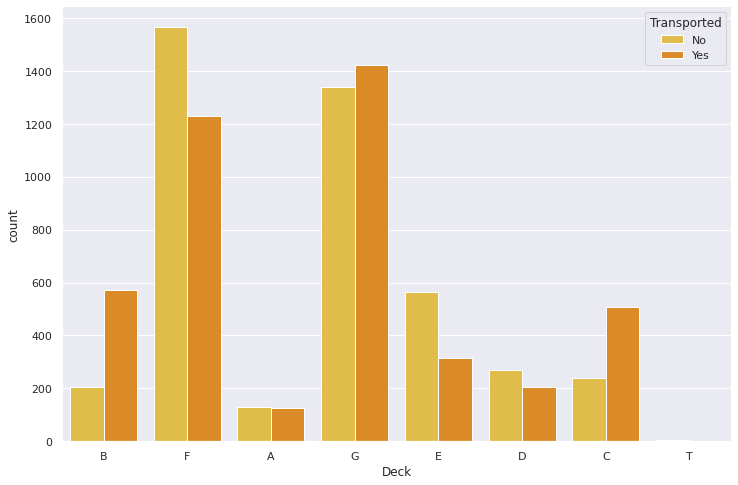

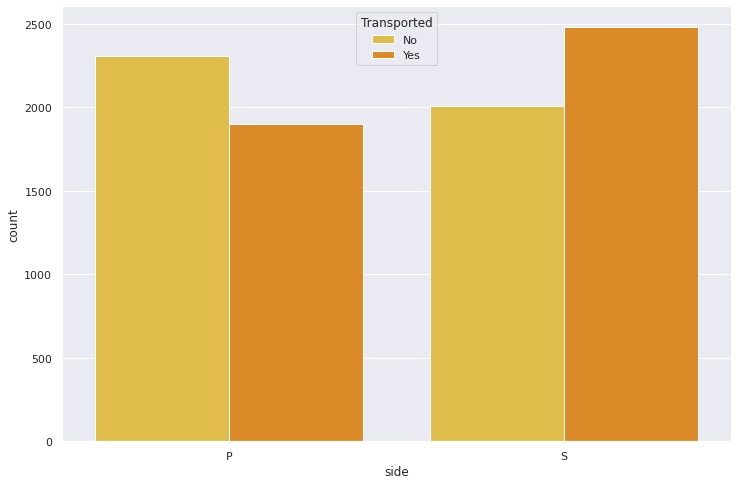

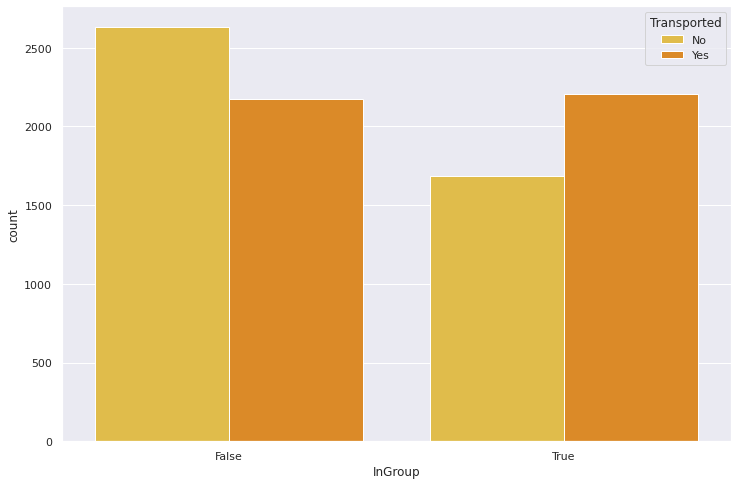

In [35]:
for col in new_categ_features:
    plt.figure(figsize=(12,8))
    if col!="Transported":
        sns.countplot(x=col,hue='Transported',data=df_train, palette=colors)

* Passengers from earth are less likely to be transported.
* Passengers in CryoSleep are more likely to be transported.
* Passengers who are traveling to Trappist-le are less likely to be transported.
* Being a VIP doesn't seem to significantly affect chances of being transported.
* passengers on decks F and port-side are more likely to be transported.
* Passengers who are traveling in group are less likely to be transported.

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  2.4  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Managing Outliers</span> <a class="anchor" id="section_2_4"></a>

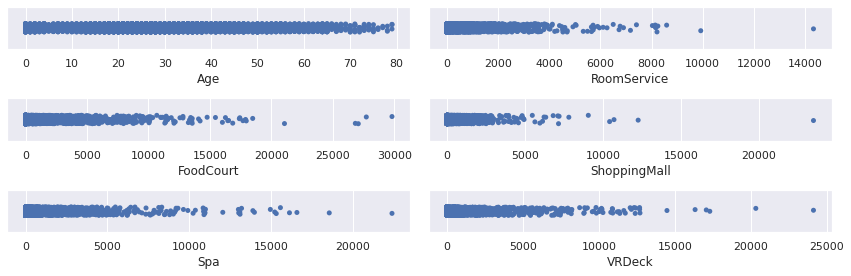

In [36]:
fig = plt.figure(figsize= (12,4))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot( 3, 2, i+1)
    
    sns.stripplot(x=df_train[col], ax=ax)

fig.tight_layout()  
plt.show()

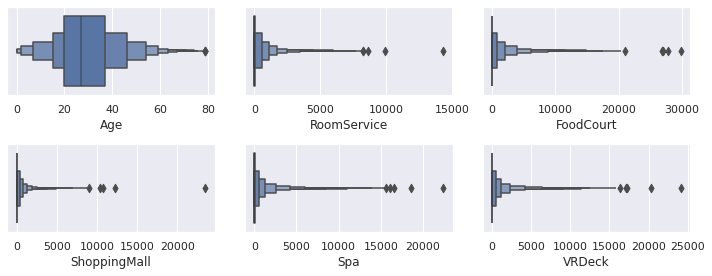

In [37]:
fig = plt.figure(figsize= (10,4))
for i, col in enumerate(num_features):
    
    ax=fig.add_subplot( 2, 3, i+1)
    
    sns.boxenplot(x=df_train[col],ax=ax)
fig.tight_layout()  
plt.show()

In [38]:
def outliers_visualisation(var,var_out):
  f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
  sns.distplot(var, ax=ax[0])
  sns.boxenplot(var, ax=ax[1])
  sns.stripplot(var, ax=ax[2])
  stats.probplot(var, plot=ax[3])
  plt.suptitle('data with ouliers',fontsize=20)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)

  fig.tight_layout()
  plt.show()

  f, ax = plt.subplots(nrows=1, ncols=4, figsize=(18, 3))
  sns.distplot(var_out, ax=ax[0])
  sns.boxenplot(var_out, ax=ax[1])
  sns.stripplot(var_out, ax=ax[2])
  stats.probplot(var_out, plot=ax[3])
  plt.suptitle('data without ouliers',fontsize=20)
  plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.4, 
                    hspace=0.4)
  fig.tight_layout()
  plt.show()

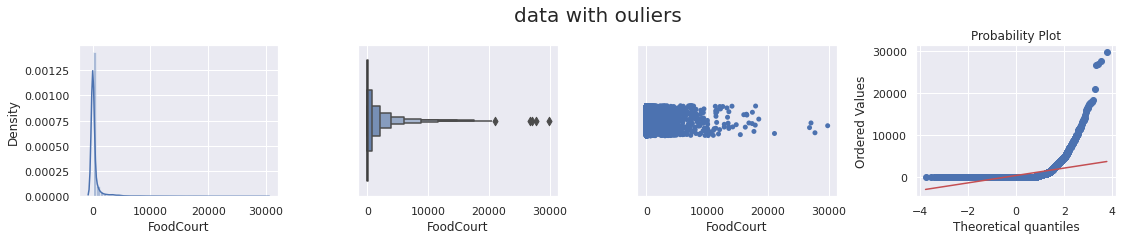

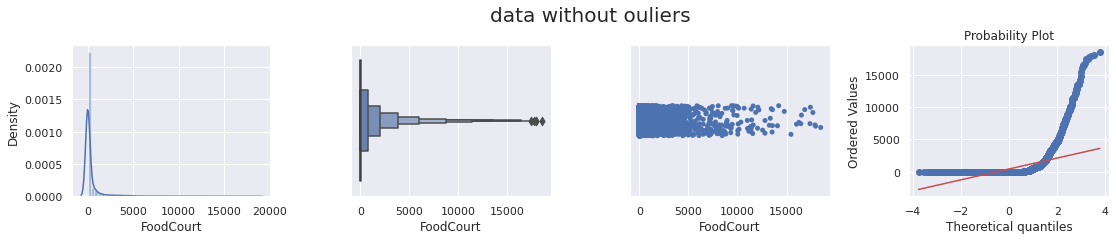

In [39]:
#Remove some outliers from "FoodCourt"
df=df_train.copy()
df=df[(df['FoodCourt']<20000)]
outliers_visualisation(df_train['FoodCourt'],df['FoodCourt'])

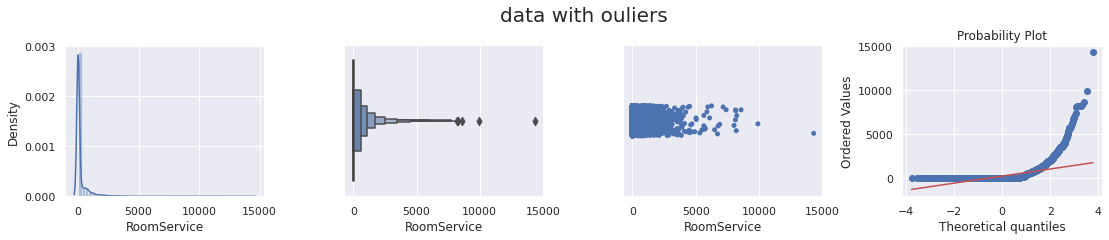

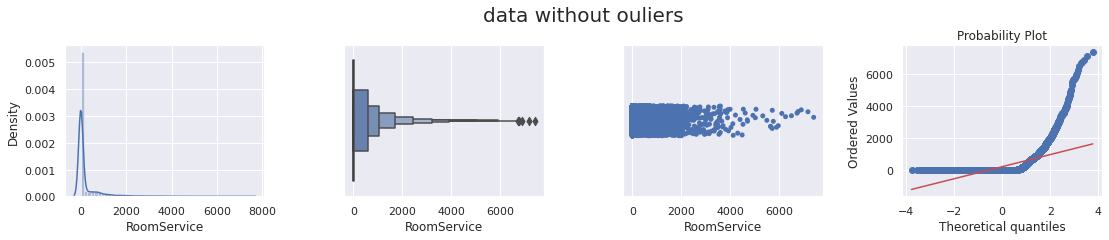

In [40]:
#Remove some outliers from "RoomService"
df=df[(df['RoomService']<7500)]
outliers_visualisation(df_train['RoomService'],df['RoomService'])

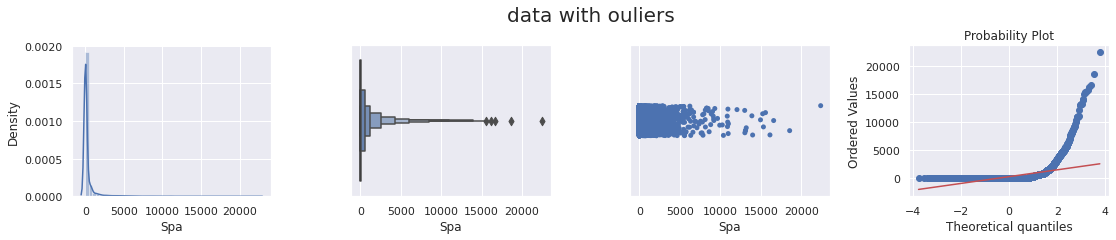

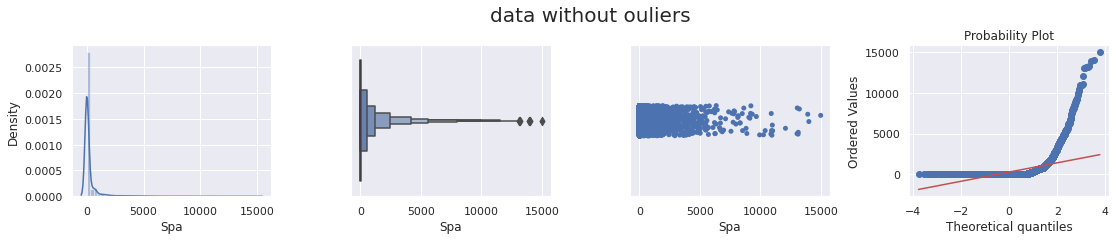

In [41]:
#Remove some outliers from "Spa"
df=df[(df['Spa']<15000)]
outliers_visualisation(df_train['Spa'],df['Spa'])

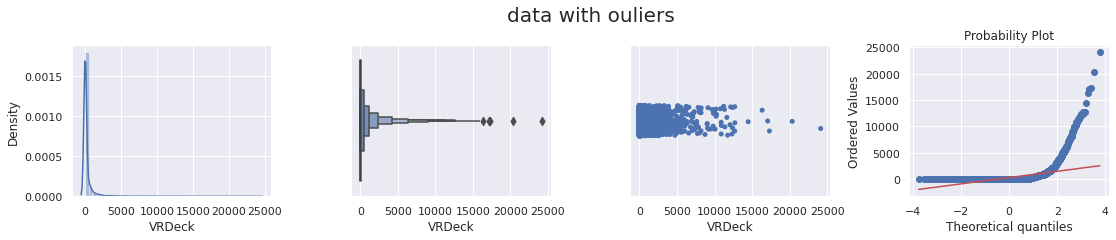

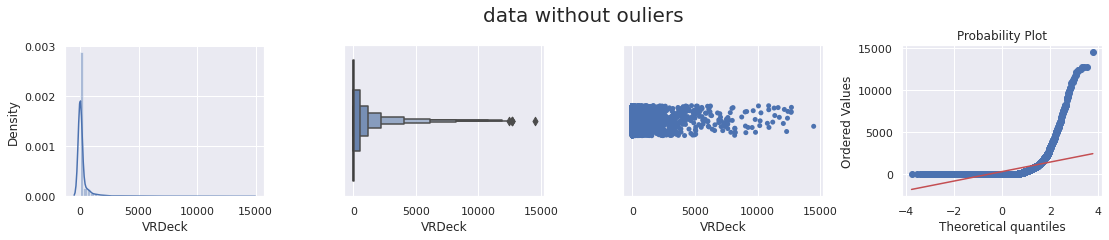

In [42]:
#Remove some outliers from "VRDeck"
df=df[(df['VRDeck']<15000)]
outliers_visualisation(df_train['VRDeck'],df['VRDeck'])

In [43]:
df=df.reset_index(drop=True)
print('shape of df_train befor removing outliers:',df_train.shape)
print('shape of df_test after removing outliers:',df.shape)

shape of df_train befor removing outliers: (8693, 14)
shape of df_test after removing outliers: (8667, 14)


## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  2.5  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Feature Seletion using statistical test</span> <a class="anchor" id="section_2_5"></a>

> ### <span style="color:orange;font-weight: bolder">Anova Test</span> <a class="anchor" id="section_2_5_1"></a>

In [44]:
from scipy import stats
for col in num_features:
  df_anova = df[[col,'Transported']]
  grouped_anova = df_anova.groupby(['Transported'])
  f_value, p_value = stats.f_oneway(grouped_anova.get_group('Yes')[col],grouped_anova.get_group('No')[col])
  result = ""
  if p_value<0.05:
    result="{0} is IMPORTANT for Prediction".format(col)
  else:
    result="{0} is NOT an important predictor. (Discard {0} from model)".format(col)
  print(result)

Age is IMPORTANT for Prediction
RoomService is IMPORTANT for Prediction
FoodCourt is IMPORTANT for Prediction
ShoppingMall is NOT an important predictor. (Discard ShoppingMall from model)
Spa is IMPORTANT for Prediction
VRDeck is IMPORTANT for Prediction


> ### <span style="color:orange;font-weight: bolder">Chi Square Test</span> <a class="anchor" id="section_2_5_2"></a>

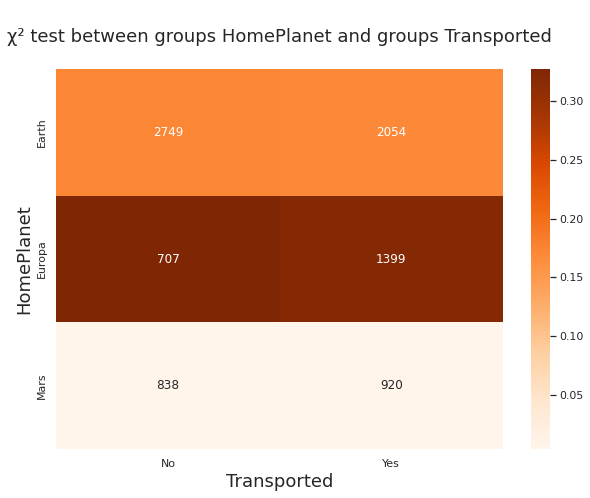

P-Value of the ChiSq Test bewteen HomePlanet and Transported is: 1.278811515700602e-72

significance=0.050, p=0.000
Dependent (reject H0)


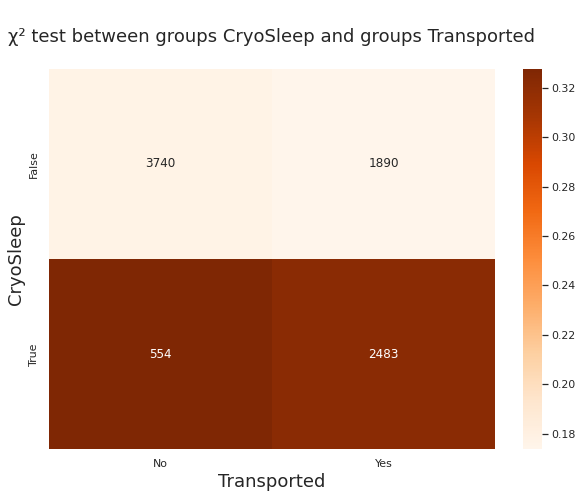

P-Value of the ChiSq Test bewteen CryoSleep and Transported is: 0.0

significance=0.050, p=0.000
Dependent (reject H0)


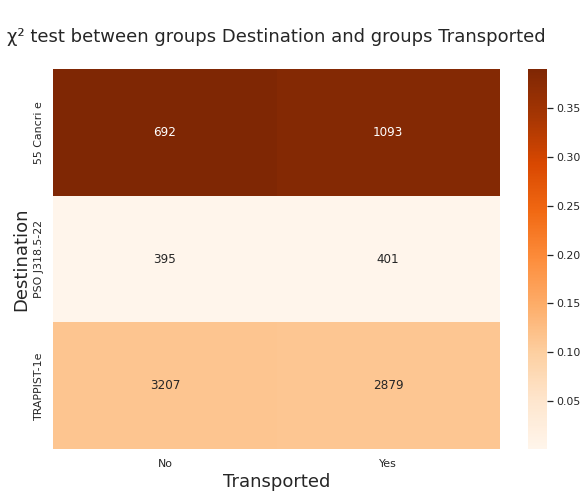

P-Value of the ChiSq Test bewteen Destination and Transported is: 5.5515715439198596e-24

significance=0.050, p=0.000
Dependent (reject H0)


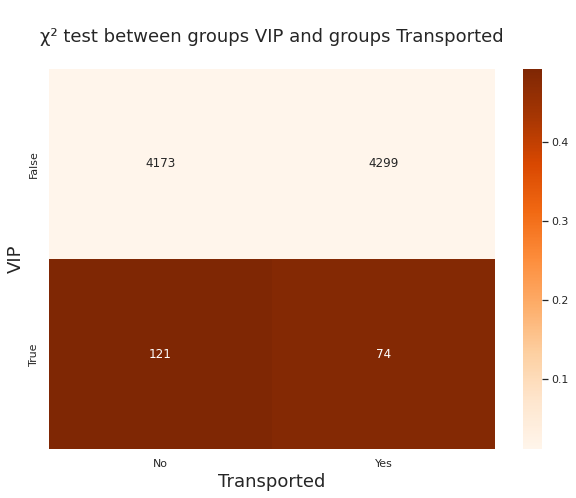

P-Value of the ChiSq Test bewteen VIP and Transported is: 0.0005387567829643586

significance=0.050, p=0.001
Dependent (reject H0)


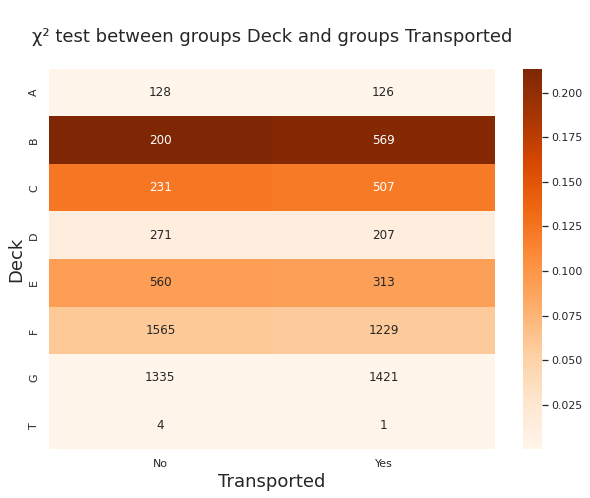

P-Value of the ChiSq Test bewteen Deck and Transported is: 5.545043333287446e-83

significance=0.050, p=0.000
Dependent (reject H0)


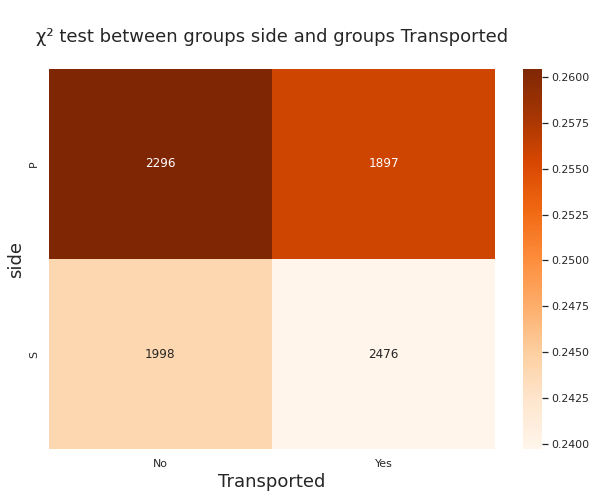

P-Value of the ChiSq Test bewteen side and Transported is: 6.811288435080097e-21

significance=0.050, p=0.000
Dependent (reject H0)


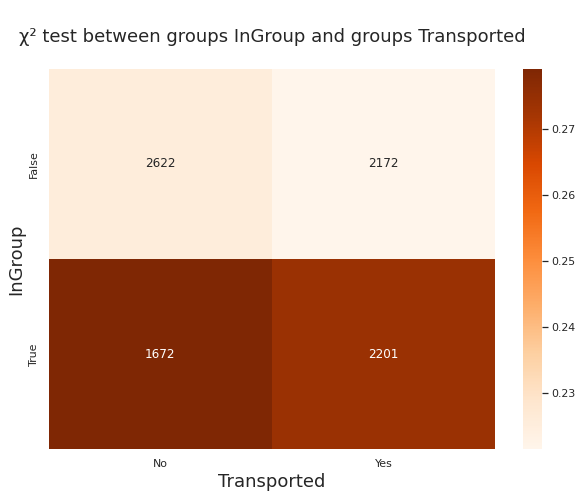

P-Value of the ChiSq Test bewteen InGroup and Transported is: 1.8329088997988286e-26

significance=0.050, p=0.000
Dependent (reject H0)


In [45]:
# Plot contingency table
data_train_categ=df[new_categ_features]
sns.set(rc={"figure.figsize": (10, 7)})
X = [col for col in new_categ_features if col!='Transported']
Y = ['Transported'] * len(X)

# Parameters for Chi-squared test (5% significance level)
prob = 0.95
alpha = 1.0 - prob

for i, j in zip(X, Y):
    # Contingency table
    cont = data_train_categ[[i, j]].pivot_table(
        index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
    tx = cont.loc[:, ["Total"]]
    ty = cont.loc[["Total"], :]
    n = len(data_train_categ)
    indep = tx.dot(ty) / n
    c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
    measure = (c - indep) ** 2 / indep
    xi_n = measure.sum().sum()
    table = measure / xi_n

    # Plot contingency table
    p = sns.heatmap(table.iloc[:-1, :-1],
                    annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
    p.set_xlabel(j, fontsize=18)
    p.set_ylabel(i, fontsize=18)
    p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
    plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=data_train_categ[i], columns=data_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")
    print('significance=%.3f, p=%.3f' % (alpha, ChiSqResult[1]))
    if ChiSqResult[1] <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

Loking at the result of Chi-square test we see that the variable "ShoppingMall" is not correlated with the target variable,so, we'll remove it from both training and test dataset.

In [46]:
#Remove "ShoppingMall" from both training and test dataset
df.drop(['ShoppingMall'], axis=1, inplace=True)
df_test.drop(['ShoppingMall'], axis=1, inplace=True)

# <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  3  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Model Building</span> <a class="anchor" id="Chapter3"></a>

In [47]:
X= pd.get_dummies(df.drop(['Transported'],axis=1),drop_first=True)
y= df['Transported']

In [48]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
def model_performance(model,model_name,X_train = X_train,y_train = y_train,X_test = X_test,y_test = y_test):
    
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    
    Training_Accuracy = np.round(model.score(X_train,y_train),3)
    Testing_Accuracy = np.round(model.score(X_test,y_test),3)
    cm=confusion_matrix(y_test, y_test_pred)
    
    print("Model Performance for:",model_name)
    #print("Best_estimator:",model.best_params_)
    print("")
    print("Training Accuracy:",Training_Accuracy)
    print("Testing Accuracy:",Testing_Accuracy)
    print("classification_report:\n",classification_report(y_test,y_test_pred))
    print("")

    print("confusion_matrix:\n",sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24}))
    
    return Training_Accuracy,Testing_Accuracy

Model Performance for: GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowski', 'manhattan', 'euclidean'],
                         'n_neighbors': range(1, 50)})

Training Accuracy: 0.796
Testing Accuracy: 0.788
classification_report:
               precision    recall  f1-score   support

          No       0.82      0.74      0.78       868
         Yes       0.76      0.83      0.80       866

    accuracy                           0.79      1734
   macro avg       0.79      0.79      0.79      1734
weighted avg       0.79      0.79      0.79      1734


confusion_matrix:
 AxesSubplot(0.125,0.125;0.775x0.755)


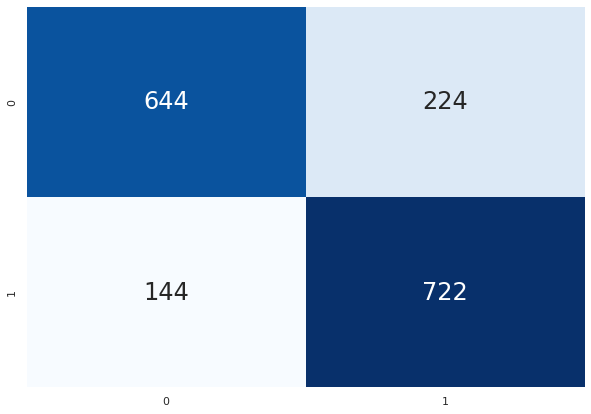

In [51]:
knn_model=KNeighborsClassifier()
param_grid= {'n_neighbors':range(1,50), 'metric': ['minkowski','manhattan','euclidean']}
knn_grid_model = GridSearchCV(knn_model,param_grid,cv=5)
KNN=model_performance(knn_grid_model,model_name = knn_grid_model)

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  3.1  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Logistic Regression</span> <a class="anchor" id="section_3_1"></a>

Model Performance for: GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

Training Accuracy: 0.79
Testing Accuracy: 0.784
classification_report:
               precision    recall  f1-score   support

          No       0.79      0.77      0.78       868
         Yes       0.77      0.80      0.79       866

    accuracy                           0.78      1734
   macro avg       0.78      0.78      0.78      1734
weighted avg       0.78      0.78      0.78      1734


confusion_matrix:
 AxesSubplot(0.125,0.125;0.775x0.755)


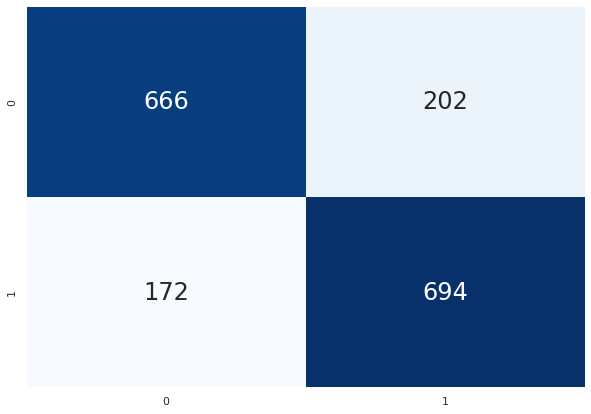

In [52]:
logreg = LogisticRegression()
param_grid_2= {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
logreg_grid_model = GridSearchCV(logreg,param_grid_2,cv=5)
logistic_Regression=model_performance(logreg_grid_model,model_name = logreg_grid_model)

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  3.2  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Random Forest Classifier</span> <a class="anchor" id="section_3_2"></a>

Model Performance for: GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 20, 30],
                         'min_samples_leaf': [15, 20, 30],
                         'min_samples_split': [5, 20, 50],
                         'n_estimators': [1, 5, 10]})

Training Accuracy: 0.813
Testing Accuracy: 0.794
classification_report:
               precision    recall  f1-score   support

          No       0.80      0.79      0.79       868
         Yes       0.79      0.80      0.79       866

    accuracy                           0.79      1734
   macro avg       0.79      0.79      0.79      1734
weighted avg       0.79      0.79      0.79      1734


confusion_matrix:
 AxesSubplot(0.125,0.125;0.775x0.755)


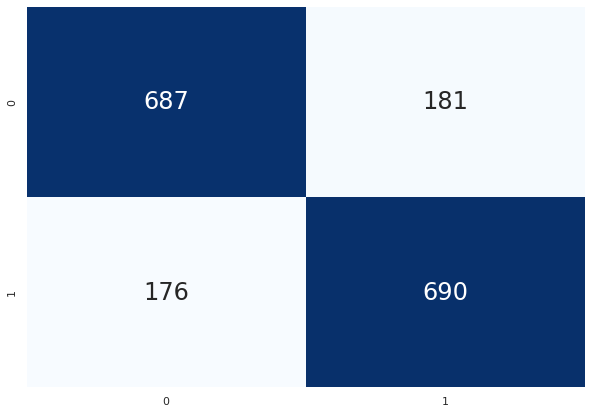

In [53]:
Rf=RandomForestClassifier(random_state=42)
param_grid_3 = {
     'criterion':['gini','entropy'],
    'max_depth':[2,3,4,5,20,30],
    'min_samples_split':[5,20,50],
    'min_samples_leaf':[15,20,30],
    'n_estimators': [1,5,10]
}
Rf_grid_model = GridSearchCV(Rf,param_grid_3,cv=5)
RandomForest=model_performance(Rf_grid_model,model_name = Rf_grid_model)

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  3.3  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Decision Tree Classifier</span> <a class="anchor" id="section_3_3"></a>

Model Performance for: GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

Training Accuracy: 0.793
Testing Accuracy: 0.784
classification_report:
               precision    recall  f1-score   support

          No       0.83      0.71      0.77       868
         Yes       0.75      0.86      0.80       866

    accuracy                           0.78      1734
   macro avg       0.79      0.78      0.78      1734
weighted avg       0.79      0.78      0.78      1734


confusion_matrix:
 AxesSubplot(0.125,0.125;0.775x0.755)


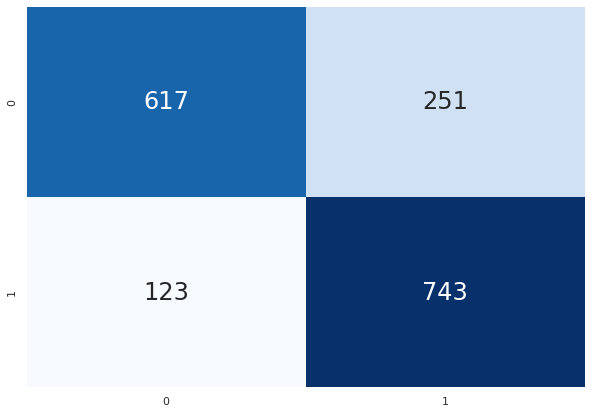

In [54]:
param_grid_4 = {'criterion':['gini','entropy'],'max_depth':np.arange(1,10),'min_samples_split':np.arange(2,10),'min_samples_leaf':np.arange(1,10)}
DT_grid_model  = GridSearchCV(DecisionTreeClassifier(random_state=42),param_grid = param_grid_4,cv=5)
DecisionTree=model_performance(DT_grid_model,model_name = DT_grid_model)

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  3.4  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">AdaBoost Classifier</span> <a class="anchor" id="section_3_4"></a>

Model Performance for: DecisionTreeClassifier(random_state=42)

Training Accuracy: 0.955
Testing Accuracy: 0.745
classification_report:
               precision    recall  f1-score   support

          No       0.75      0.73      0.74       868
         Yes       0.74      0.76      0.75       866

    accuracy                           0.75      1734
   macro avg       0.75      0.75      0.75      1734
weighted avg       0.75      0.75      0.75      1734


confusion_matrix:
 AxesSubplot(0.125,0.125;0.775x0.755)


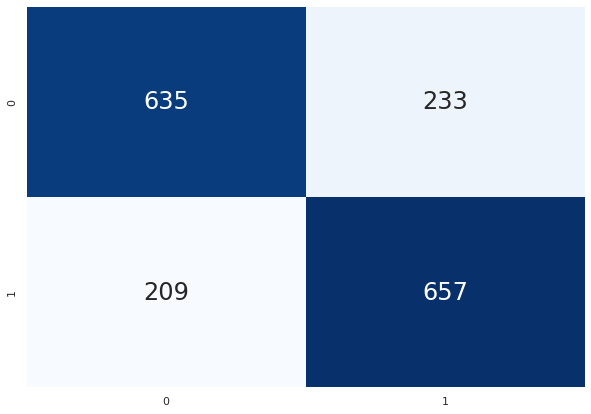

In [55]:
DTC = DecisionTreeClassifier(random_state = 42)
param_grid_6 = {'base_estimator__max_depth':[i for i in range(2,11,2)],
             'base_estimator__min_samples_leaf':[5,10],
             'n_estimators':[10,50,250,1000],
             'learning_rate':[0.01,0.1]}
ABC = AdaBoostClassifier(base_estimator = DTC)
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid_6, cv=5)
Adaboost=model_performance(DTC,model_name = DTC)

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  3.5  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Gradient Boosting Classifier</span> <a class="anchor" id="section_3_5"></a>

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set

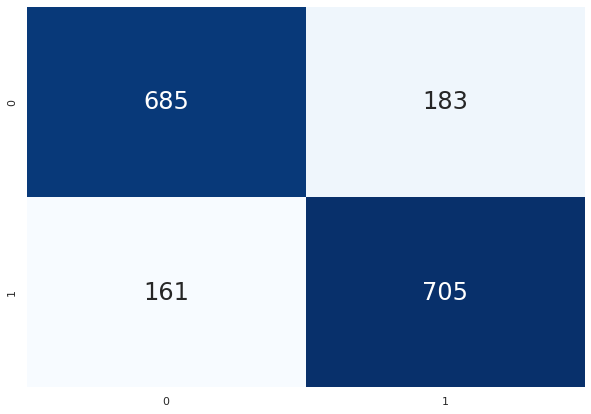

In [56]:
param_grid_7 = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }
LGBM_grid_model  = GridSearchCV(LGBMClassifier(random_state=42),param_grid = param_grid_7,cv=5)
LGBM=model_performance(LGBM_grid_model,model_name = LGBM_grid_model)

## <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">  4  </span> &nbsp; <span style="background-color:#DFFF00; padding: 5px; border-radius:5px;color:#DE3163;font-weight: bolder">Model choice and submission</span> <a class="anchor" id="Chapter4"></a>

In [57]:
model_performance = [["KNN",KNN[0],KNN[1]],
                     ["Logistic Regression",logistic_Regression[0],logistic_Regression[1]],
                     [ "Random Forest",RandomForest[0],RandomForest[1]],
                     ["Decision Tree",DecisionTree[0],DecisionTree[1]],
                     ["Adaboost",Adaboost[0],Adaboost[1]],
                     ["LGBM",LGBM[0],LGBM[1]]]

In [58]:
performance = pd.DataFrame(model_performance,columns = ['Model_Name',"Train Score","Test Score"])

In [59]:
display(performance)

,Model_Name,Train Score,Test Score
0,KNN,0.796,0.788
1,Logistic Regression,0.790,0.784
2,Random Forest,0.813,0.794
3,Decision Tree,0.793,0.784
4,Adaboost,0.955,0.745
5,LGBM,0.849,0.802


<AxesSubplot:xlabel='Test Score', ylabel='Model_Name'>

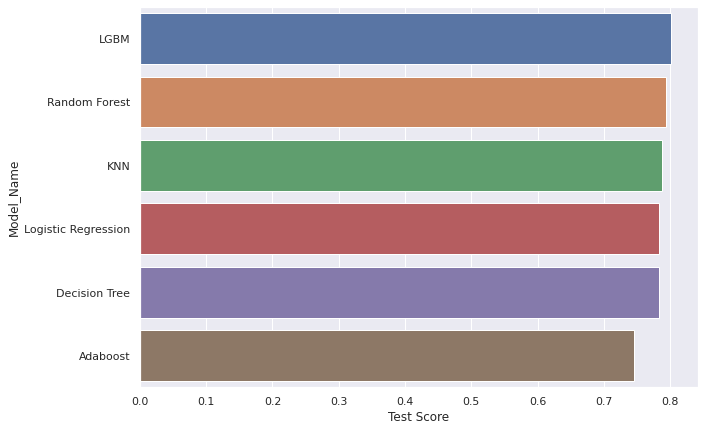

In [60]:
sns.barplot(x='Test Score',
            y="Model_Name", 
            data=performance, 
            order=performance.sort_values('Test Score',ascending = False).Model_Name)

In [61]:
best_model=LGBM_grid_model.best_estimator_
best_model

LGBMClassifier(lambda_l1=0, lambda_l2=1, min_data_in_leaf=30, random_state=42,
               reg_alpha=0.1)

In [62]:
pred=pd.Series(best_model.predict(df_test)).map({'No':False, 'Yes':True})

In [63]:
submission = pd.DataFrame({'PassengerId': Id_test_list,
                       'Transported': pred})
submission.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [64]:
submission.to_csv("submission.csv", index=False)

<span style=" padding: 5px; border-radius:5px;color:red;font-weight: bolder;font-size: 24px;font-family: cursive">If you like my work, don't forget to upvote and leave me a comment.This will help me to continue and sharing more topics in the coming days.</span>